In [ ]:
import pymc3 as pm

In [ ]:
with pm.Model() as my_model:
    # X = pm.distributions.discrete.DiscreteUniform(lower = 0, upper = 5)
    X = pm.Categorical("X", p = [0.1, 0.1, 0.1, 0.2, 0.2, 0.3])

In [ ]:
print(my_model)

In [ ]:
with pm.Model() as my_model:
    discrete_rv = pm.DiscreteUniform('discrete_rv', lower=0, upper=1)
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step)
    pm.traceplot(trace)
    plt.show()

In [31]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
true_coin_bias = 0.3 # The (unknown) bias of the coin
num_flips = 100
# The given data, the result of 100 coin flips
data = np.random.choice([1, 0], p=[1-true_coin_bias, true_coin_bias], size=num_flips)
unique, counts = np.unique(data, return_counts=True)

print(np.asarray((unique, counts)).T)
print(data)

[[ 0 28]
 [ 1 72]]
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0
 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1]


In [34]:
# We want to infer the bias, p. Since p is unknown, it is a random variable.
# The distribution we assign to it here is our prior distribution on p, uniform on the range [0, 1].
p = pm.Uniform("p", lower=0, upper=1)

In [35]:
# We need another random variable for our observations.
# We give the relevant data to the value argument.
# The observed flag stops the value changing during MCMC exploration.
observations = pm.Bernoulli("obs", p=p, value=data, observed=True)

In [42]:
model = pm.Model([p, observations])
mcmc = pm.MCMC(model)
mcmc.sample(60000, 10000) # 60000 steps, with a burn in period of 10000
p_samples = mcmc.trace("p")[:] # Samples from our posterior on p

 [-----------------100%-----------------] 60000 of 60000 complete in 2.3 sec

50000
0.7152353697655647


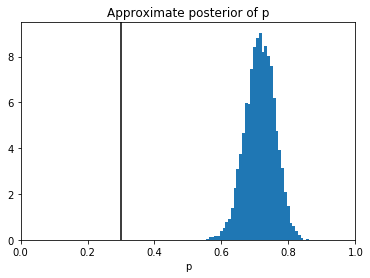

In [43]:
print(len(p_samples))
print(p_samples.mean())
plt.hist(p_samples, bins=40, density=True)
plt.axvline(x=true_coin_bias, c="k")
plt.xlabel("p")
plt.title("Approximate posterior of p")
plt.xlim(0,1);
plt.show()

Text(0.5,1,'Is my code bug-free?')

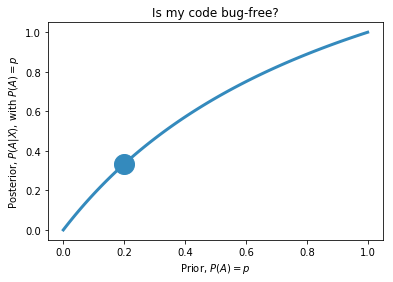

In [61]:
# fig = figsize(12.5, 4)
p = np.linspace(0, 1, 100)
# print(p)
plt.plot(p, 2 * p / (1 + p), color="#348ABD", lw=3)
# plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2 * (0.2) / 1.2, s=400, c="#348ABD")
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Is my code bug-free?")

In [71]:
np.arange(0,10,1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])